In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Assuming the file uses '::' as a delimiter and 'ISO-8859-1' encoding
df_movie = pd.read_csv('C:/Users/crypt/Downloads/archive/IMDbMoviesIndia.csv', engine='python', encoding='ISO-8859-1')

# Drop rows with missing values
df_movie.dropna(inplace=True)

# Display the first few rows of the DataFrame
df_movie.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [3]:
df_movie.shape

(5659, 10)

In [4]:
df_movie.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [5]:
df_movie.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

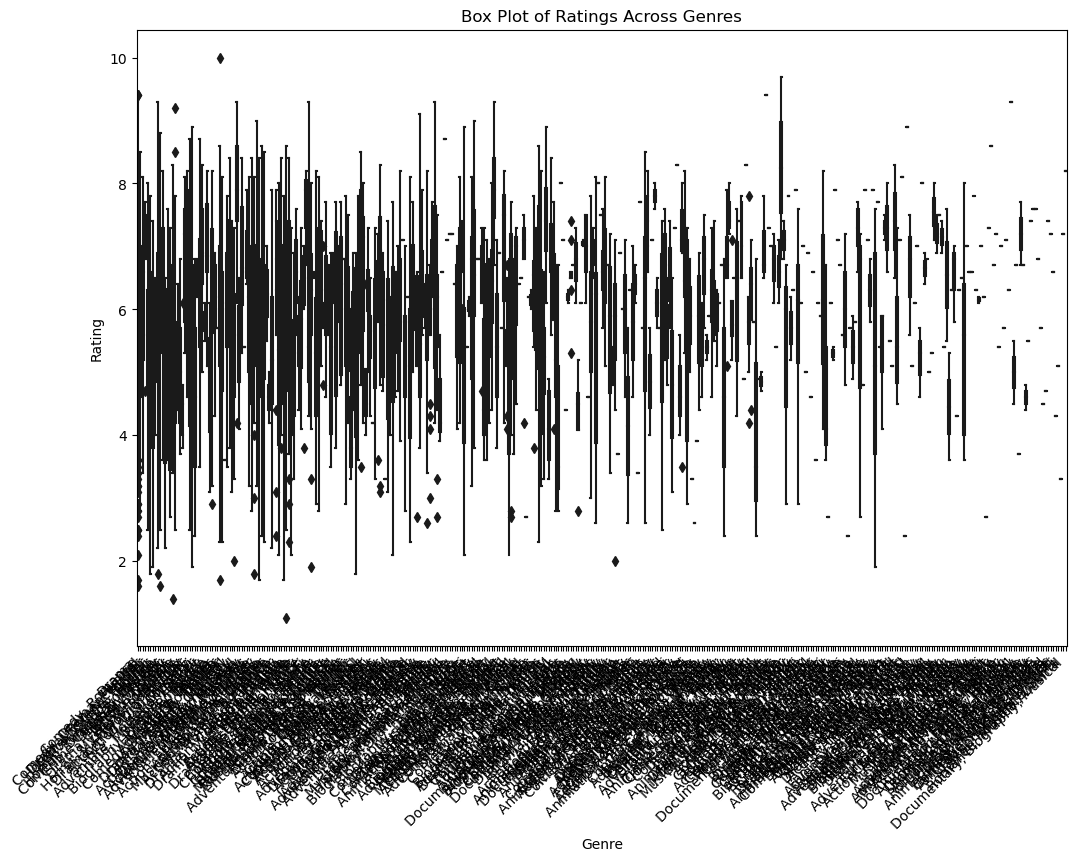

In [16]:


# Assuming your DataFrame has columns: 'Genre', 'Director', 'Actor1', 'Actor2', 'Actor3', 'Rating'
# Subset the data to include only relevant columns
subset_df = df_movie[['Genre', 'Rating']]

# Create a box plot or violin plot
plt.figure(figsize=(12, 8))
sb.boxplot(x='Genre', y='Rating', data=subset_df, palette='viridis')

# Optionally, rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Optionally, add labels and a title
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Box Plot of Ratings Across Genres')

# Show the plot
plt.show()


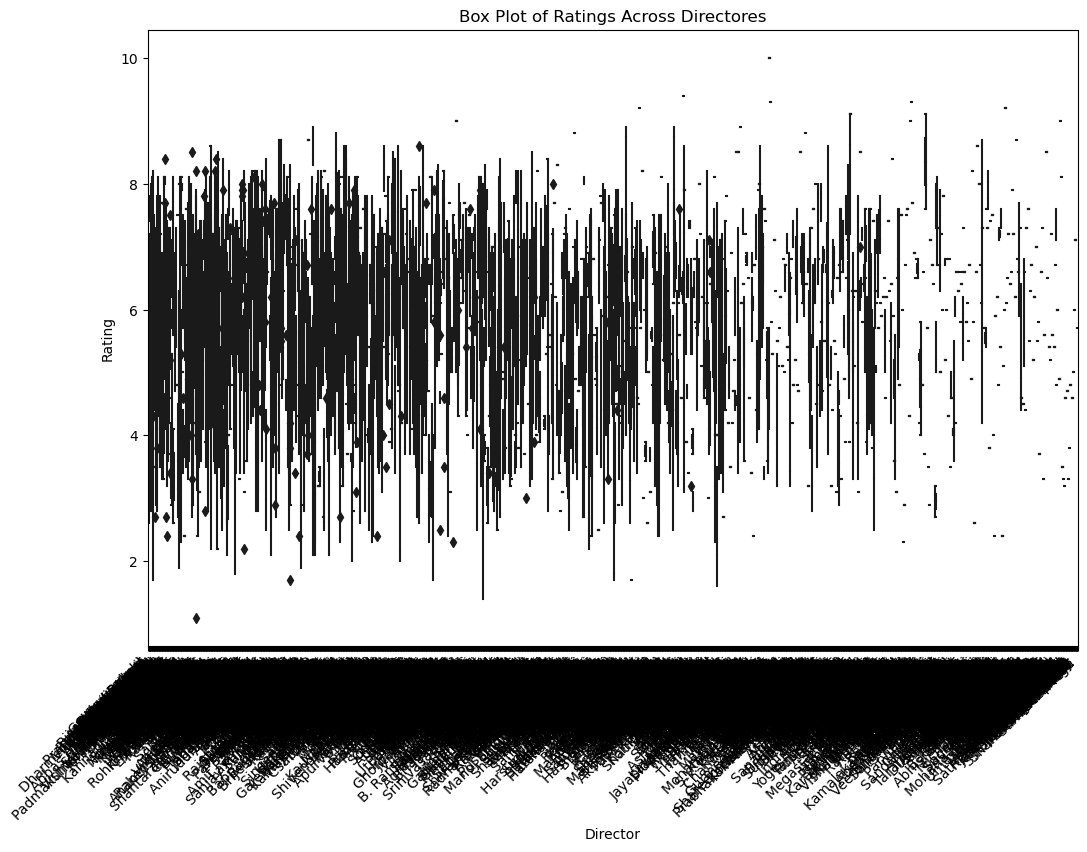

In [19]:

# Subset the data to include only relevant columns
subset_df = df_movie[['Director', 'Rating']]

# Create a box plot or violin plot
plt.figure(figsize=(12, 8))
sb.boxplot(x='Director', y='Rating', data=subset_df, palette='viridis')

# Optionally, rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Optionally, add labels and a title
plt.xlabel('Director')
plt.ylabel('Rating')
plt.title('Box Plot of Ratings Across Directores')

# Show the plot
plt.show()

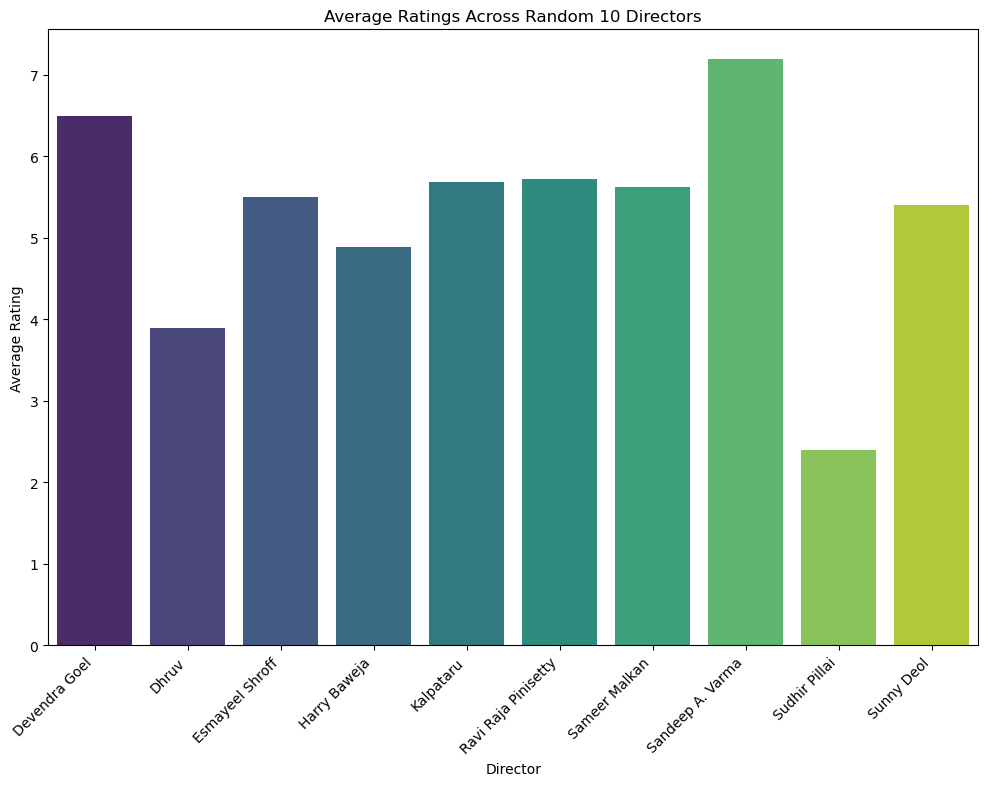

In [22]:
import seaborn as sb
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns: 'Director', 'Rating'
# Randomly select 10 directors
random_directors = df_movie['Director'].sample(n=10, random_state=42)  # Adjust random_state for reproducibility

# Filter the DataFrame for movies directed by the random directors
subset_df = df_movie[df_movie['Director'].isin(random_directors)][['Director', 'Rating']]

# Calculate the average rating for each director
average_ratings = subset_df.groupby('Director')['Rating'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 8))
sb.barplot(x='Director', y='Rating', data=average_ratings, palette='viridis')

# Optionally, rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Optionally, add labels and a title
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.title('Average Ratings Across Random 10 Directors')

# Show the plot
plt.show()


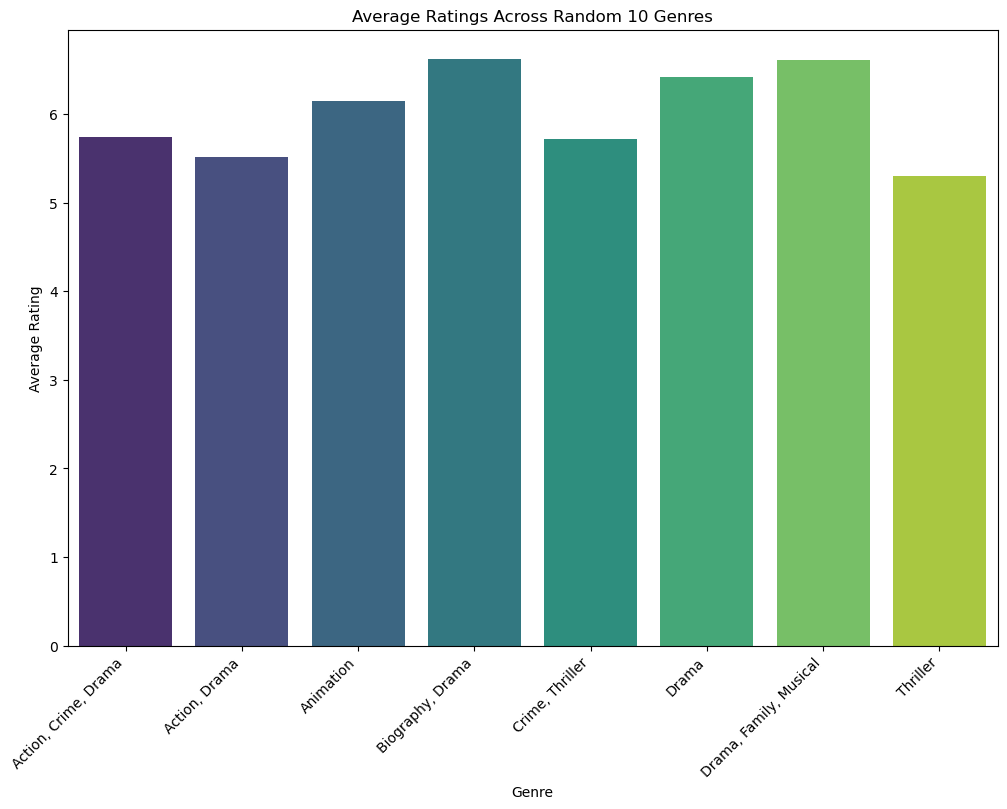

In [24]:
import seaborn as sb
import matplotlib.pyplot as plt

# Assuming your DataFrame has columns: 'Genre', 'Rating'
# Randomly select 10 genres
random_genres = df_movie['Genre'].sample(n=10, random_state=42)  # Adjust random_state for reproducibility

# Filter the DataFrame for movies with the random genres
subset_df = df_movie[df_movie['Genre'].isin(random_genres)][['Genre', 'Rating']]

# Calculate the average rating for each genre
average_ratings = subset_df.groupby('Genre')['Rating'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 8))
sb.barplot(x='Genre', y='Rating', data=average_ratings, palette='viridis')

# Optionally, rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Optionally, add labels and a title
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Ratings Across Random 10 Genres')

# Show the plot
plt.show()


In [42]:
input=df_movie.drop(['Year','Rating','Votes','Duration','Name'],axis=1)
target=df_movie['Rating']

In [43]:
input.head()

,Genre,Director,Actor 1,Actor 2,Actor 3
1,Drama,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,"Comedy, Romance",Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,"Comedy, Drama, Musical",Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,"Drama, Romance, War",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,"Horror, Mystery, Thriller",Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [54]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
input['Genre']=labelencoder.fit_transform(input['Genre'])
input['Director']=labelencoder.fit_transform(input['Director'])
input['Actor 1']=labelencoder.fit_transform(input['Actor 1'])
input['Actor 2']=labelencoder.fit_transform(input['Actor 2'])
input['Actor 3']=labelencoder.fit_transform(input['Actor 3'])

input.head()

,Genre,Director,Actor 1,Actor 2,Actor 3
1,229,629,1352,2272,319
3,184,1335,1198,719,2148
5,157,1530,378,75,2045
6,289,2044,692,1112,2524
8,320,135,1934,1175,1013


In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(input)
scaled_df=pd.DataFrame(scaled_data,
columns=input.columns)
scaled_df.head()

,Genre,Director,Actor 1,Actor 2,Actor 3
0,0.610667,0.258848,0.690148,0.979310,0.124853
1,0.490667,0.549383,0.611536,0.309914,0.840705
2,0.418667,0.629630,0.192956,0.032328,0.800391
3,0.770667,0.841152,0.353241,0.479310,0.987867
4,0.853333,0.055556,0.987238,0.506466,0.396477


In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(input, target, test_size=0.3)

In [57]:
print(y_train)

1342     4.3
834      5.9
6282     4.7
1529     7.7
10717    7.1
        ... 
15198    6.4
2998     6.2
10507    7.3
12290    6.2
160      3.1
Name: Rating, Length: 3961, dtype: float64


In [58]:
print(y_test)

15494    6.2
8357     5.3
14966    4.4
10493    4.6
12804    8.2
        ... 
7745     5.9
3623     3.6
4958     5.6
6511     6.6
6697     7.2
Name: Rating, Length: 1698, dtype: float64


In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [61]:
x_test = np.array(x_test)

In [62]:
model.predict(x_test)

C:\Users\crypt\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.86682769, 5.85216908, 6.08967015, ..., 6.2302901 , 5.78179312,
       6.05128137])

In [63]:
print(y_test)

15494    6.2
8357     5.3
14966    4.4
10493    4.6
12804    8.2
        ... 
7745     5.9
3623     3.6
4958     5.6
6511     6.6
6697     7.2
Name: Rating, Length: 1698, dtype: float64


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'model' is your trained regression model
# Predictions on the test set
y_pred = model.predict(x_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 1.1154321670623215
Mean Squared Error (MSE): 1.9001274170280058
R-squared (R²): 0.021395134520099335


C:\Users\crypt\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
